We examine the following dataset showing the nutritional value of 80 cereal products. This is done as an exercise to rehash the writer on essential Python data

In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandasql as ps

The dataset came from Kaggle, a website that is a host to a plethora of datasets for beginners, intermediate, and advanced learners. Further, the data was gathered by Petra Isenberg, Pierre Dragicevic and Yvonne Jansen. Using the dataset 'cereal', we can conduct a descriptive analysis on the nutritional data of 80 brands of cereals

In [6]:
plt.style.use('bmh')
df = pd.read_csv('cereal.csv')
df.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


We first identified the manufacturers (mfr in the dataset) of the selected cereal brands. We have identified seven (7) manufacturers. Particularly:

* A for American Home Food Products
* G for General Mills
* K for Kelloggs
* N for Nabisco
* P for Post
* Q for Quaker Oats
* R for Ralston Purina

Kellogs has 23 cereals in the dataset, thus composing the majority of the dataset (28.75%) while American Home Food Products has the least count with only one cereal (1.25)

In [50]:
mfr = df.loc[:, 'mfr']
mfr_unique = mfr.unique()
mfr_nunique = mfr.nunique()
mfr_count = df.loc[:, 'mfr'].value_counts()

mfr_K = np.divide(23,80)
mfr_A = np.divide(1,80)
mfr_K_dec = np.multiply(mfr_K,100)
mfr_A_dec = np.multiply(mfr_A,100)

print("Initials of Manufacters:", mfr_unique)
print("Number of Unique Values:", mfr_nunique)
print("Count of Manufacturers in the Dataset:")
print(mfr_count)
print("Percentage of the majority of Dataset:", round(mfr_K_dec,2),"%")
print("Percentage of the least of the Dataset:", round(mfr_A_dec,2),"%")

Initials of Manufacters: ['N' 'Q' 'K' 'R' 'G' 'P' 'A']
Number of Unique Values: 7
Count of Manufacturers in the Dataset:
K    23
G    22
P     9
Q     8
R     8
N     6
A     1
Name: mfr, dtype: int64
Percentage of the majority of Dataset: 28.75 %
Percentage of the least of the Dataset: 1.25 %


The distribution of the count of manfuactureres can be visualized as such:

<BarContainer object of 7 artists>

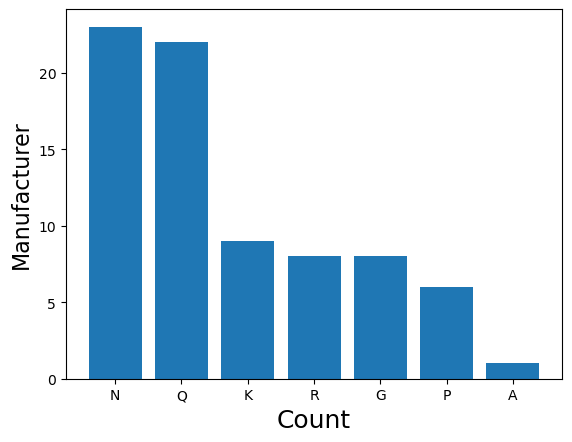

In [53]:
mfr_x = mfr.unique()
mfr_y = df.loc[:, 'mfr'].value_counts()

plt.xlabel("Count", fontsize=18)
plt.ylabel("Manufacturer", fontsize=16)
plt.bar(mfr_x, mfr_y)

The data also separated the cereals from two types: Hot (denoted with H) and Cold (C). There are 74 Cold cereals indetified, thus comprising 96.1% of the entire dataset while only three hot cereals were idetified, which only composed 3.9% of the dataset.

In [51]:
horc_count = df.loc[:, 'type'].value_counts()
horc_C = np.divide(74,77)
horc_H = np.divide(3,77)
horc_C_dec = np.multiply(horc_C,100)
horc_H_dec = np.multiply(horc_H,100)

print("Number of Cold and Hot cereals:")
print(horc_count)
print("Percentage of Cold Cereal:",round(horc_C_dec,2),"%")
print("Percentage of Hot Cereal:",round(horc_H_dec,2),"%")

Number of Cold and Hot cereals:
C    74
H     3
Name: type, dtype: int64
Percentage of Cold Cereal: 96.1 %
Percentage of Hot Cereal: 3.9 %


The data can be presented as such:

([<matplotlib.patches.Wedge at 0x1857bf10b20>,
 [Text(-1.0917703468611777, 0.1343037963522388, 'C'),
  Text(1.0917703405739623, -0.13430384746169677, 'H')])

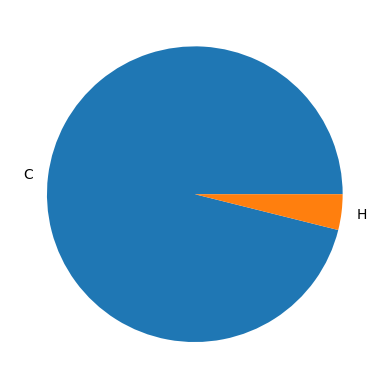

In [57]:
horc = df.loc[:, 'type']
horc_labels = horc.unique()

plt.pie(horc_count, labels = horc_labels)

We then calculated for the average nutrients per pack of cereal. Upon calculation, these are the findings:

In [48]:
cal_mean = df['calories'].mean()
prt_mean = df['protein'].mean()
fib_mean = df['fat'].mean()
sod_mean = df['sodium'].mean()
sug_mean = df['sugars'].mean()

print("Average Calories:", round(cal_mean,2))
print("Average Protein:", round(prt_mean,2))
print("Average Fiber Count:", round(fib_mean,2))
print("Average Sodium:", round(sod_mean,2))
print("Average Sugar Count:", round(sug_mean,2))

Average Calories: 106.88
Average Protein: 2.55
Average Fiber Count: 1.01
Average Sodium: 159.68
Average Sugar Count: 6.92


To further examine if cereals have exceeded the average nutrients needed, a combination chart has been made to visualize the data

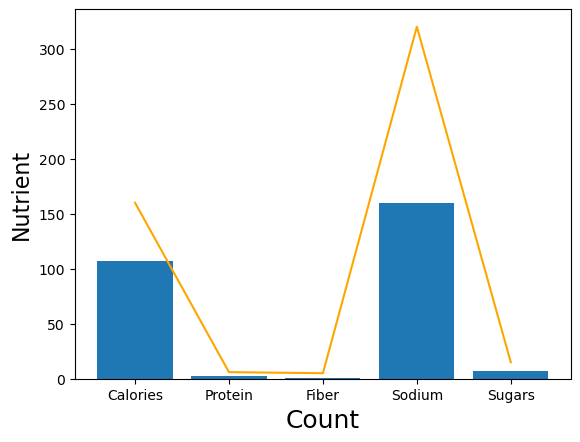

In [65]:
nut_x = ["Calories","Protein","Fiber","Sodium","Sugars"]
nut_y = [cal_mean,prt_mean,fib_mean,sod_mean,sug_mean]

cal_max = df['calories'].max(axis=0)
prt_max = df['protein'].max(axis=0)
fib_max = df['fat'].max(axis=0)
sod_max = df['sodium'].max(axis=0)
sug_max = df['sugars'].max(axis=0)
nut_y_max = [cal_max,prt_max,fib_max,sod_max,sug_max]

plt.xlabel("Count", fontsize=18)
plt.ylabel("Nutrient", fontsize=16)
plt.bar(nut_x, nut_y)
plt.plot(nut_x, nut_y_max, color='orange')